In [497]:
import numpy as np
import pandas as pd

#csv_datei lesen und als Dataframe speichern
df = pd.read_csv("/Users/user/Documents/Bewerbung RLI/Aufgabe/2023-03-15 Data Bewerbungsaufgabe.csv", 
                             sep=";",
                             header=0,
                             names=["1", "Energiequelle", "Leistung in kW"]) 


#erste Spalte löschen
del df['1']  


print(df)


     Energiequelle Leistung in kW
0             wind            850
1             wind            850
2             wind            850
3             wind            850
4             wind            850
...            ...            ...
5102          wind           1.65
5103          wind            850
5104          wind           1.65
5105          wind            850
5106          wind            850

[5107 rows x 2 columns]


In [498]:
#sortieren Energiequellen in alphabetisch Reihenfolge
df_sorted = df.sort_values('Energiequelle')  


print(df_sorted)
print(df_sorted.dtypes)

     Energiequelle Leistung in kW
4652        biogas            yes
3022        biogas            NaN
3021        biogas            NaN
3020        biogas            NaN
3018        biogas            NaN
...            ...            ...
2994           NaN            NaN
2995           NaN            NaN
3334           NaN            NaN
3529           NaN            NaN
4549           NaN            NaN

[5107 rows x 2 columns]
Energiequelle     object
Leistung in kW    object
dtype: object


In [499]:
#Angewandt auf alle Zeilen des Dataframe
for i in range(len(df)):  
    df_sorted.loc[df['Leistung in kW']=='yes','Leistung in kW']=600 #wenn 'Leistung in kW' == yes, ändern in 600

#Einträge der Spalte 'Leistung in kW' zu numerisch ändern. Wenn string vorliegt, 'NaN' als error ausgeben.
df_sorted['Leistung in kW'] = pd.to_numeric(df_sorted['Leistung in kW'], errors = 'coerce') 

print(df_sorted)
print(df_sorted.dtypes)

     Energiequelle  Leistung in kW
4652        biogas           600.0
3022        biogas             NaN
3021        biogas             NaN
3020        biogas             NaN
3018        biogas             NaN
...            ...             ...
2994           NaN             NaN
2995           NaN             NaN
3334           NaN             NaN
3529           NaN             NaN
4549           NaN             NaN

[5107 rows x 2 columns]
Energiequelle      object
Leistung in kW    float64
dtype: object


In [500]:
#Alles Zeilen mit 'NaN'-Eintrag in der Spalte 'Leistung in kW' löschen
df_numeric = df_sorted.dropna(subset=['Leistung in kW'])  

print(df_numeric)
print(df_numeric.dtypes)


     Energiequelle  Leistung in kW
4652        biogas           600.0
2432        biogas           250.0
2427        biogas           901.0
2424        biogas           889.0
2407        biogas           330.0
...            ...             ...
1915          wind          3200.0
1914          wind          3200.0
1912          wind          3200.0
1913          wind          3200.0
5106          wind           850.0

[2762 rows x 2 columns]
Energiequelle      object
Leistung in kW    float64
dtype: object


In [501]:
#Liste mit Energiequellen
quelle_list = ['biogas','biomass','coal','gas','hydro','nuclear','wind'] 


for quelle in quelle_list:
    #Für jeden Energiequelle ein eigenes DataFrame erstellen
    df_quelle = df_numeric[df_numeric['Energiequelle']=='quelle']  

print(df_gas)
print(df_gas.dtypes)


    Energiequelle  Leistung in kW
207           gas               1
194           gas              10
195           gas               2
196           gas               2
220           gas               2
223           gas               2
237           gas               2
198           gas             420
185           gas             440
187           gas             440
188           gas             440
230           gas             800
Energiequelle     object
Leistung in kW     int64
dtype: object


   Leistung in kW  Häufigkeit
0               1           1
1               2           5
2              10           1
3             420           1
4             440           3
5             800           1


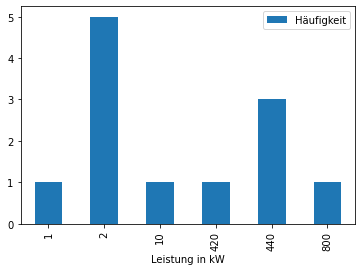

In [496]:
import matplotlib as plt

#Einträge der Spalte 'Leistung in kW' zählen, anschließend index-Spalte hinzufügen und Namen zu 'Häufigkeit' umändern
freq = df_gas.groupby(['Leistung in kW']).count().reset_index().rename(columns={'Energiequelle':'Häufigkeit'}) 

print(freq)
print(f

#Balkendiagramm erstellen, mit den Spalten als x- und x-Werten
bar = freq.plot.bar(x = 'Leistung in kW', y = 'Häufigkeit')

#Plot abspeichern als png-Datei
bar.figure.savefig("/Users/user/Documents/Bewerbung RLI/Aufgabe/Häufigkeit der Energiequelle gas.png") #Plot als png-Datei speichern